In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob

In [2]:
#DataSet
df = pd.read_csv("your_new_dataset.csv", encoding="latin1")
print("Columns in dataset:", df.columns.tolist())

Columns in dataset: ['Brand', 'Model', 'Review Summary', 'Star Rating ']


In [13]:
# Check available columns
print("Columns in dataset:")
print(df.columns.tolist())

Columns in dataset:
['Brand', 'Model', 'Review Summary', 'Star Rating ']


In [14]:
# first 20 rows of the dataset
df.head(20)

,Brand,Model,Review Summary,Star Rating
0,Samsung,Galaxy S22,Excellent camera and performance,4.9
1,Apple,iPhone 14,"Great build, but not a huge upgrade",4.8
2,Asus,ROG Phone 6,"Best for gaming, bulky design",4.7
3,OnePlus,Nord 2T,Fast charging and clean UI,4.6
4,Xiaomi,Redmi Note 11,"Value for money, solid battery life",4.5
5,Realme,GT Neo 3,Excellent gaming performance,4.4
6,Oppo,Reno8,"Good all-rounder, competitive pricing",4.3
7,Vivo,V25 Pro,"Stylish design, decent camera",4.2
8,Motorola,Edge 30,Lightweight and smooth display,4.1
9,Lenovo,Legion Y90,"Extreme performance, heavy build",4.0


In [ ]:
# Define the review and brand column names
review_col = "Review Summary"
brand_col = "Brand"

In [28]:
# Calculate sentiment polarity and word count for each review
from textblob import TextBlob
df["sentiment"] = df["Review Summary"].astype(str).apply(lambda x: TextBlob(x).sentiment.polarity)
df["word_count"] = df["Review Summary"].astype(str).apply(lambda x: len(x.split()))
# Find the brand with the most positive reviews
positive_reviews = df[df["sentiment"] > 0]
brand_positive_counts = positive_reviews.groupby("Brand").size().sort_values(ascending=False)
print("Top brands by number of positive reviews:")
print(brand_positive_counts)
print("\nBrand with the most positive reviews:")
print(brand_positive_counts.idxmax(), "with", brand_positive_counts.max(), "positive reviews")

Top brands by number of positive reviews:
Brand
Realme      47
Xiaomi      45
Vivo        45
Apple       39
Tecno       39
Infinix     39
Google      38
Motorola    36
OnePlus     36
Samsung     34
Nokia       32
Lenovo      28
Sony        22
Asus        22
Lava        18
Oppo         1
dtype: int64

Brand with the most positive reviews:
Realme with 47 positive reviews


In [29]:
# Find the brand with the most negative reviews
negative_reviews = df[df["sentiment"] < 0]
brand_negative_counts = negative_reviews.groupby("Brand").size().sort_values(ascending=False)
print("Top brands by number of negative reviews:")
print(brand_negative_counts)
print("\nBrand with the most negative reviews:")
print(brand_negative_counts.idxmax(), "with", brand_negative_counts.max(), "negative reviews")

Top brands by number of negative reviews:
Brand
Nokia       6
Lenovo      3
Asus        2
Google      1
Motorola    1
Sony        1
dtype: int64

Brand with the most negative reviews:
Nokia with 6 negative reviews


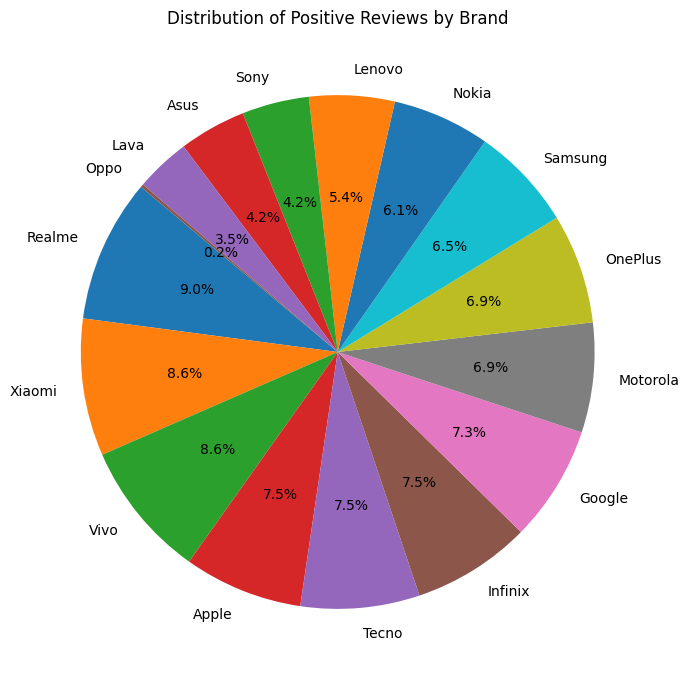

In [31]:
# Pie chart for positive reviews by brand
import matplotlib.pyplot as plt
positive_counts = df[df["sentiment"] > 0].groupby("Brand").size().sort_values(ascending=False)
plt.figure(figsize=(7,7))
plt.pie(positive_counts, labels=positive_counts.index, autopct="%1.1f%%", startangle=140)
plt.title("Distribution of Positive Reviews by Brand")
plt.axis("equal")
plt.tight_layout()
plt.show()

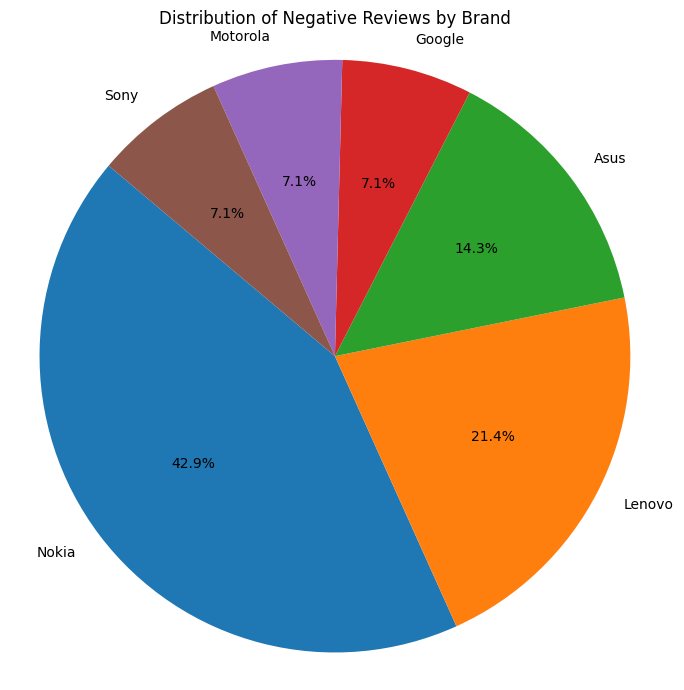

In [32]:
# Pie chart for negative reviews by brand
import matplotlib.pyplot as plt
negative_counts = df[df["sentiment"] < 0].groupby("Brand").size().sort_values(ascending=False)
plt.figure(figsize=(7,7))
plt.pie(negative_counts, labels=negative_counts.index, autopct="%1.1f%%", startangle=140)
plt.title("Distribution of Negative Reviews by Brand")
plt.axis("equal")
plt.tight_layout()
plt.show()

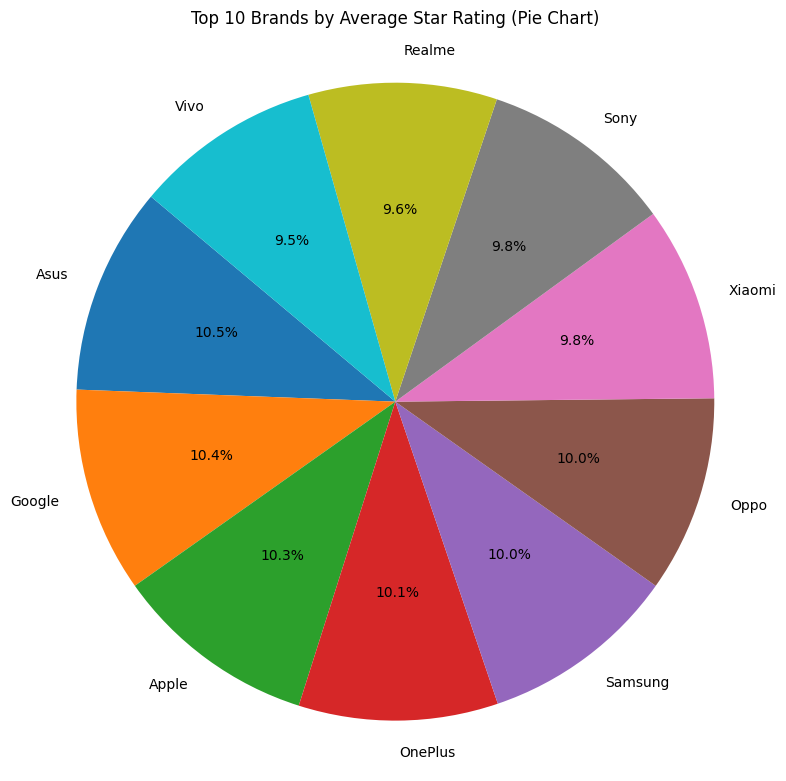

In [36]:
# Pie chart for top 10 brands by average star rating (with percentage)
import matplotlib.pyplot as plt
import pandas as pd
df["Star Rating "] = pd.to_numeric(df["Star Rating "], errors="coerce")
brand_avg_rating = df.groupby("Brand")["Star Rating "] .mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(8,8))
plt.pie(brand_avg_rating, labels=brand_avg_rating.index, autopct="%1.1f%%", startangle=140)
plt.title("Top 10 Brands by Average Star Rating (Pie Chart)")
plt.axis("equal")
plt.tight_layout()
plt.show()